In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore")

In [23]:
df = pd.read_csv("../Data/healthcare-dataset-stroke-data.csv")

In [24]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Displaying those rows that have heart disease

In [58]:
df[df["heart_disease"]==1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4855,42563,Female,57.0,1,1,Yes,Private,Rural,231.72,45.7,formerly smoked,0
4869,72715,Female,50.0,0,1,Yes,Private,Urban,193.80,26.4,never smoked,0
4921,4062,Male,72.0,0,1,Yes,Private,Rural,238.27,NaN,smokes,0
4986,53697,Male,58.0,0,1,Yes,Private,Rural,225.35,26.5,smokes,0


### Displaying those rows that have hypertension and no heart disease 

In [62]:
df[(df["hypertension"]==1) & (df["heart_disease"] == 0)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
15,58202,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5088,22190,Female,64.0,1,0,Yes,Self-employed,Urban,76.89,30.2,Unknown,0
5091,6369,Male,59.0,1,0,Yes,Private,Rural,95.05,30.9,never smoked,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


### Find Missing values from the dataset and clean the data.

In [25]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [28]:
data=df.drop(columns="id")

In [29]:
indices = data[data.isna().any(axis=1)].index
data[data.isna().any(axis=1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [30]:
data["age_group"]=data["age"].apply(lambda x:"Infant" if (x>=0)&(x<=2)
                                  else ("Child" if (x>2)&(x<=12)
                                  else ("Adolescent"if (x>12)&(x<=18)  
                                  else ("Young Adults"if (x>19)&(x<=35)  
                                  else ("Middle Aged Adults" if (x>35)&(x<=60) 
                                  else "Old Aged Adults")))))

In [31]:
data.groupby(["gender","ever_married","age_group"])["bmi"].mean()

gender  ever_married  age_group         
Female  No            Adolescent            26.207558
                      Child                 19.534225
                      Infant                18.346341
                      Middle Aged Adults    30.200820
                      Old Aged Adults       29.691111
                      Young Adults          28.134084
        Yes           Middle Aged Adults    31.517157
                      Old Aged Adults       29.672853
                      Young Adults          30.543919
Male    No            Adolescent            25.529730
                      Child                 19.777523
                      Infant                18.988506
                      Middle Aged Adults    31.925352
                      Old Aged Adults       28.805882
                      Young Adults          28.603636
        Yes           Adolescent            27.400000
                      Middle Aged Adults    31.969624
                      Old Aged Adults    

In [32]:
# fill null value
data['bmi'] = data['bmi'].fillna(data.groupby(["gender","ever_married","age_group"])["bmi"].transform('mean'))
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Old Aged Adults
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.672853,never smoked,1,Old Aged Adults
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Old Aged Adults
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Middle Aged Adults
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Old Aged Adults


In [33]:
data.iloc[indices,:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.672853,never smoked,1,Old Aged Adults
8,Female,59.0,0,0,Yes,Private,Rural,76.15,31.517157,Unknown,1,Middle Aged Adults
13,Male,78.0,0,1,Yes,Private,Urban,219.84,29.967442,Unknown,1,Old Aged Adults
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,31.925352,Unknown,1,Middle Aged Adults
27,Male,58.0,0,0,Yes,Private,Rural,189.84,31.969624,Unknown,1,Middle Aged Adults
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,31.925352,formerly smoked,0,Middle Aged Adults
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,31.969624,smokes,0,Middle Aged Adults
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.517157,smokes,0,Middle Aged Adults
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,31.969624,smokes,0,Middle Aged Adults


## Data Preprocessing

In [34]:
data.describe ()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.915485,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.722894,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.300000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


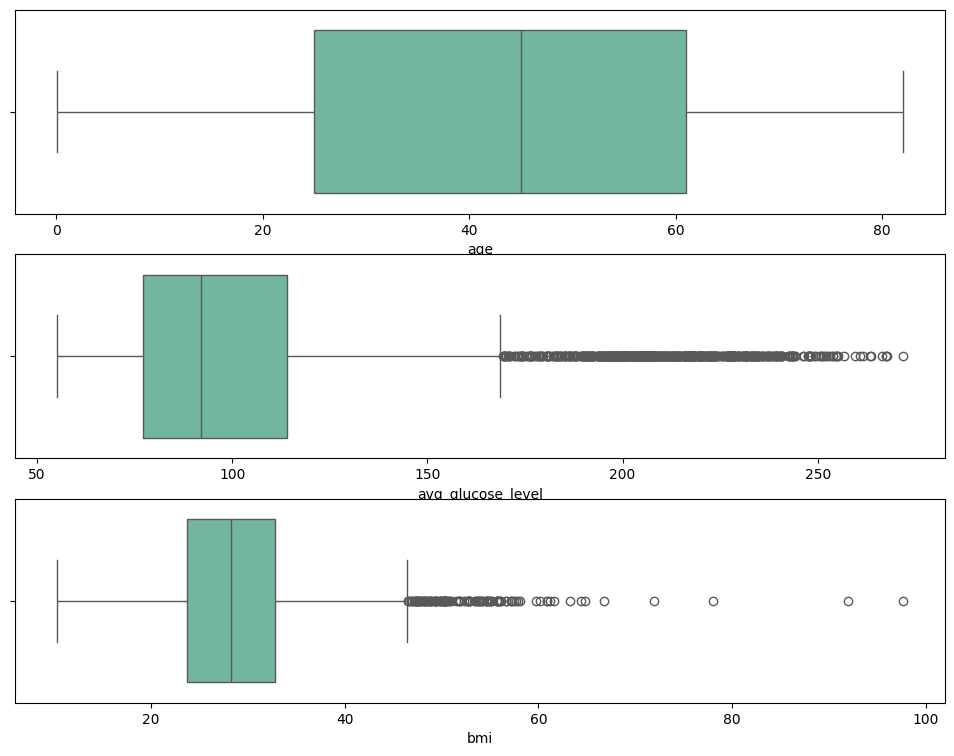

In [38]:
import seaborn as sns
# outlier detaction
plt.figure(figsize=(12,9))
for i,col in enumerate(data.select_dtypes(float).columns):
    plt.subplot(3,1,i+1)
    sns.boxplot(data=data,x=col,palette =sns.color_palette("Set2"))

In [39]:
data.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [40]:
data = data[(data["bmi"]<66) & (data["bmi"]>12)]

In [41]:
data = data[(data["avg_glucose_level"]>56) & (data["avg_glucose_level"]<250)]

In [42]:
data.shape

(5044, 12)

In [43]:
data=data.drop(data[data["gender"]=="Other"].index)

In [44]:
data.shape

(5043, 12)

In [46]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Old Aged Adults
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.672853,never smoked,1,Old Aged Adults
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Old Aged Adults
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Middle Aged Adults
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Old Aged Adults
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,29.672853,never smoked,0,Old Aged Adults
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Old Aged Adults
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Young Adults
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,Middle Aged Adults


In [52]:
## labling data
from sklearn.utils import resample

data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_group'],
      dtype='object')

In [49]:
had_stroke = data[data["stroke"]==1]
no_stroke = data[data["stroke"]==0]
upsampled_had_stroke = resample(had_stroke,replace=True , n_samples=no_stroke.shape[0] , random_state=123 )
upsampled_data = pd.concat([no_stroke,upsampled_had_stroke])

<Axes: >

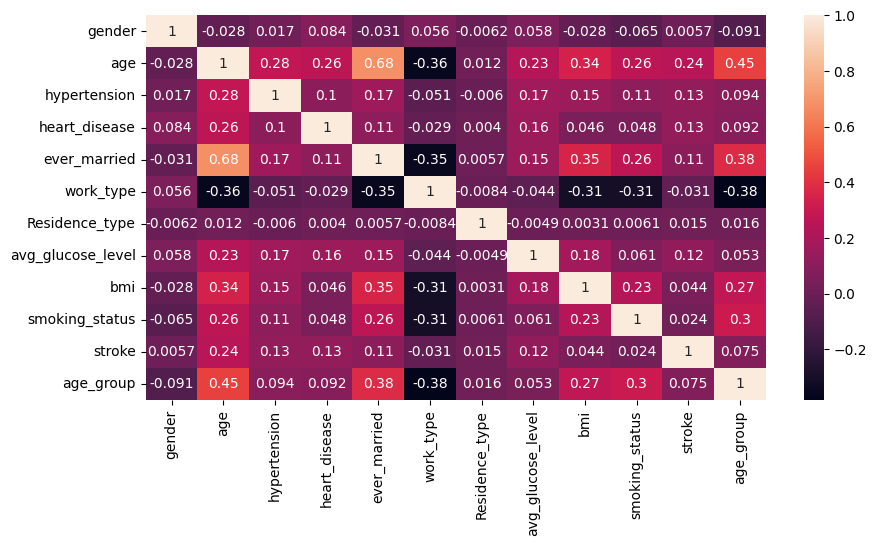

In [66]:
from sklearn.preprocessing import LabelEncoder
corr_data =data.copy()
encoder  =LabelEncoder()
for col in corr_data.select_dtypes(include="object").columns:
    corr_data[col] =encoder.fit_transform(corr_data[col])

plt.figure(figsize=(10,5))
sns.heatmap(data=corr_data.corr(),annot=True)

In [51]:
cols = ['gender','hypertension','heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status']
dums = pd.get_dummies(upsampled_data[cols],dtype=int)
model_data = pd.concat([upsampled_data,dums],axis=1).drop(columns=cols)

In [54]:
model_data["age_group"] = encoder.fit_transform(model_data["age_group"])

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for col in ['age','avg_glucose_level','bmi']:
    scaler.fit(model_data[[col]])
    model_data[col]=scaler.transform(model_data[[col]])

In [56]:
model_data

,age,avg_glucose_level,bmi,stroke,age_group,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,0.035645,0.202080,0.108571,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0
250,0.707031,0.165028,0.512381,0,3,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
251,0.096680,0.283689,0.100952,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
252,0.853516,0.067119,0.449524,0,4,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
253,0.169922,0.544452,0.129524,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.951172,0.012937,0.226667,1,4,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
229,0.975586,0.051542,0.440000,1,4,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
29,0.719238,0.805786,0.374660,1,3,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
27,0.707031,0.692248,0.374660,1,3,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0


In [57]:
model_data.to_csv("../Data/PreProcessedData-heart.csv",index=False)

In [ ]:
data[data.isna().any(axis=1)]